In [287]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

# To reduce output size while working with vscode
%config InlineBackend.figure_format = 'png'

np.random.seed(42)

In [288]:
missions = pd.read_csv("datasets/space-missions.csv", index_col=0)

In [289]:
missions.head()

,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [290]:
missions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Company Name    4324 non-null   object
 2   Location        4324 non-null   object
 3   Datum           4324 non-null   object
 4   Detail          4324 non-null   object
 5   Status Rocket   4324 non-null   object
 6    Rocket         964 non-null    object
 7   Status Mission  4324 non-null   object
dtypes: int64(1), object(7)
memory usage: 304.0+ KB


In [291]:
missions["Datum"] = pd.to_datetime(missions["Datum"])
missions["Year"] = [date.year for date in missions["Datum"]]
missions["Rocket"] = missions[" Rocket"].str.replace(",", "").astype("float32")
missions = missions.drop(columns=["Unnamed: 0.1", " Rocket"])
missions

,Company Name,Location,Datum,Detail,Status Rocket,Status Mission,Year,Rocket
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,2020,50.00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,2020,29.75
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,Success,2020,NaN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,2020,65.00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,Success,2020,145.00
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,Failure,1958,NaN
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,Success,1958,NaN
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,Failure,1957,NaN
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,Success,1957,NaN


In [264]:
missions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Datum           4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Status Rocket   4324 non-null   object 
 5   Status Mission  4324 non-null   object 
 6   Year            4324 non-null   int64  
 7   Rocket          964 non-null    float32
dtypes: float32(1), int64(1), object(6)
memory usage: 287.1+ KB


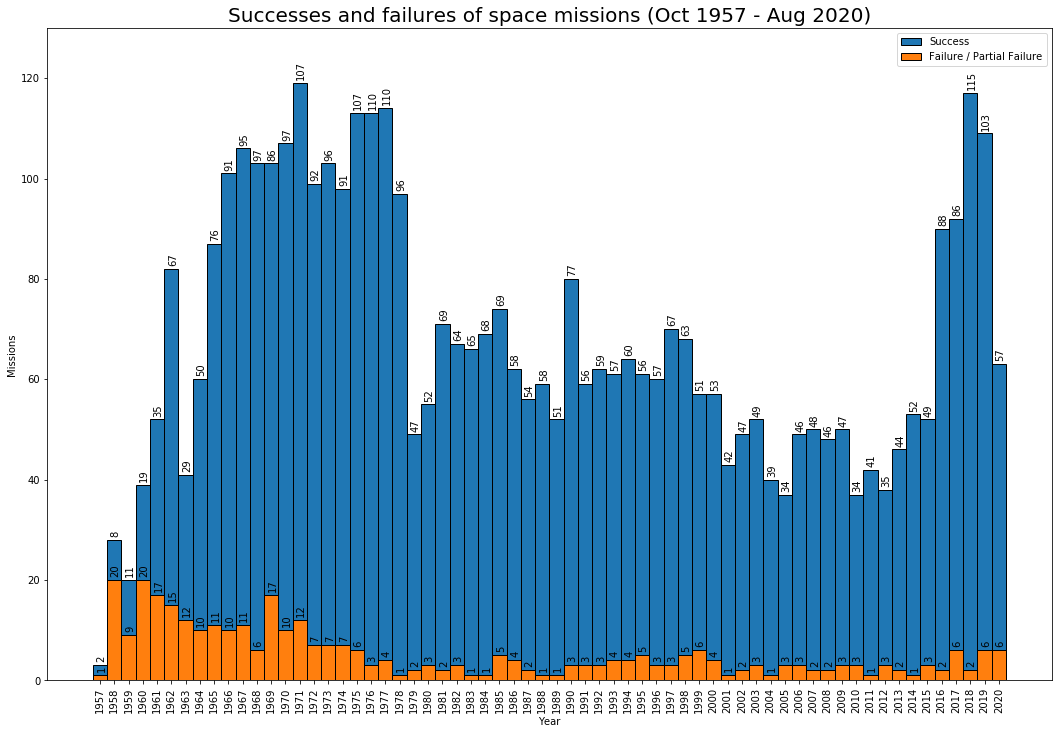

In [651]:
def successed_and_failed(missions):
    year_begin =  min(missions["Year"])
    year_end = max(missions["Year"])

    missions_years = missions["Year"].value_counts().sort_index()
    failure_missions_years = missions.loc[missions["Status Mission"] == "Failure"]["Year"].value_counts().sort_index()

    plt.subplots(figsize=(18,12))
    plt.bar(missions_years.index, missions_years.values, 
        edgecolor="k", width=1, label="Success")
    plt.bar(failure_missions_years.index, failure_missions_years.values,
        edgecolor="k", width=1, label="Failure / Partial Failure")
    plt.xticks(range(year_begin, year_end + 1), rotation=90)
    plt.ylim((0, 130))
    plt.xlabel("Year")
    plt.ylabel("Missions")
    plt.legend()
    plt.title("Successes and failures of space missions (Oct 1957 - Aug 2020)",
        fontdict={"fontsize":20})

    for year in range(year_begin, year_end + 1):
        plt.annotate(f"{missions_years[year] - failure_missions_years[year]}",
            (year - 0.25, missions_years[year] + 1), rotation=90)
        plt.annotate(f"{failure_missions_years[year]}",
            (year - 0.25, failure_missions_years[year] + 1), rotation=90)

successed_and_failed(missions)

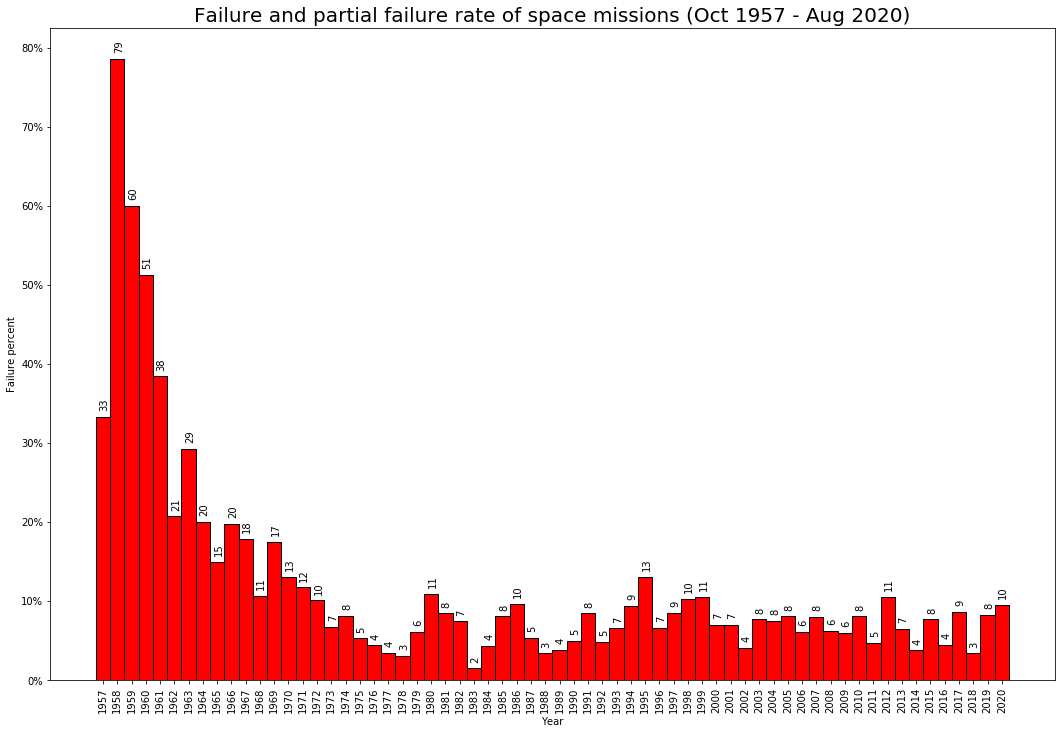

In [650]:
def faiure_rate(missions):
    year_begin = min(missions["Year"])
    year_end = max(missions["Year"])

    missions_years = missions["Year"].value_counts().sort_index()
    failure_missions_years = missions.loc[missions["Status Mission"] != "Success"]["Year"].value_counts().sort_index()
    failure_rate = failure_missions_years / missions_years

    plt.subplots(figsize=(18,12))
    plt.bar(failure_rate.index, failure_rate.values, edgecolor="k", width=1, color="r")
    plt.xticks(range(year_begin, year_end + 1), rotation=90)
    plt.gca().set_yticklabels(["{:,.0%}".format(x) for x in np.arange(0, 1, 0.1)])
    plt.xlabel("Year")
    plt.ylabel("Failure percent")
    plt.title("Failure and partial failure rate of space missions (Oct 1957 - Aug 2020)", fontdict={"fontsize":20})
    plt.grid(False)

    for year in range(year_begin, year_end + 1):
        plt.annotate(f"{failure_rate[year]*100:.0f}", 
            (year - 0.25, failure_rate[year] + 0.01), rotation=90)

faiure_rate(missions)

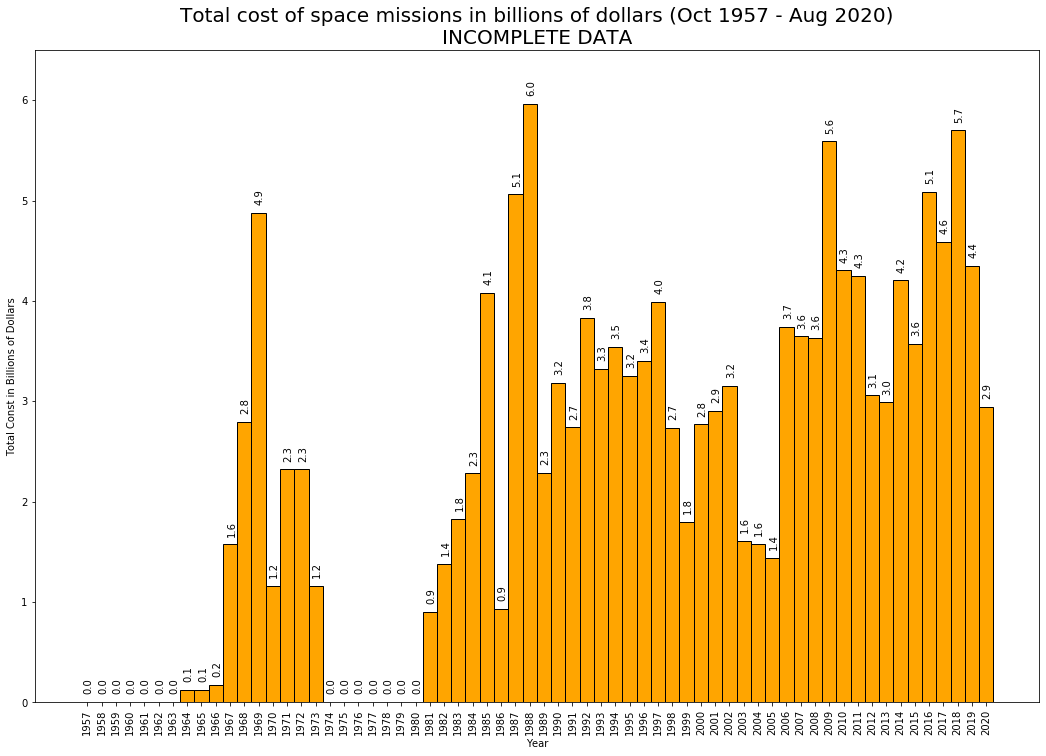

In [649]:
def costs(missions):
    year_begin =  min(missions["Year"])
    year_end = max(missions["Year"])

    missions_cost = missions.groupby(["Year"])["Rocket"].sum().sort_index() / 1000

    plt.subplots(figsize=(18,12))
    plt.bar(missions_cost.index, missions_cost.values, 
        edgecolor="k", width=1, label="Success", color="orange")
    plt.xticks(range(year_begin, year_end + 1), rotation=90)
    plt.xlabel("Year")
    plt.ylabel("Total Const in Billions of Dollars")
    plt.ylim((0, 6.5))
    plt.title("Total cost of space missions in billions of dollars (Oct 1957 - Aug 2020)\n"
        "INCOMPLETE DATA", fontdict={"fontsize":20})

    for year in range(year_begin, year_end + 1):
        plt.annotate(f"{missions_cost[year]:.1f}", 
            (year - 0.25, missions_cost[year] + 0.1), rotation=90)

costs(missions)

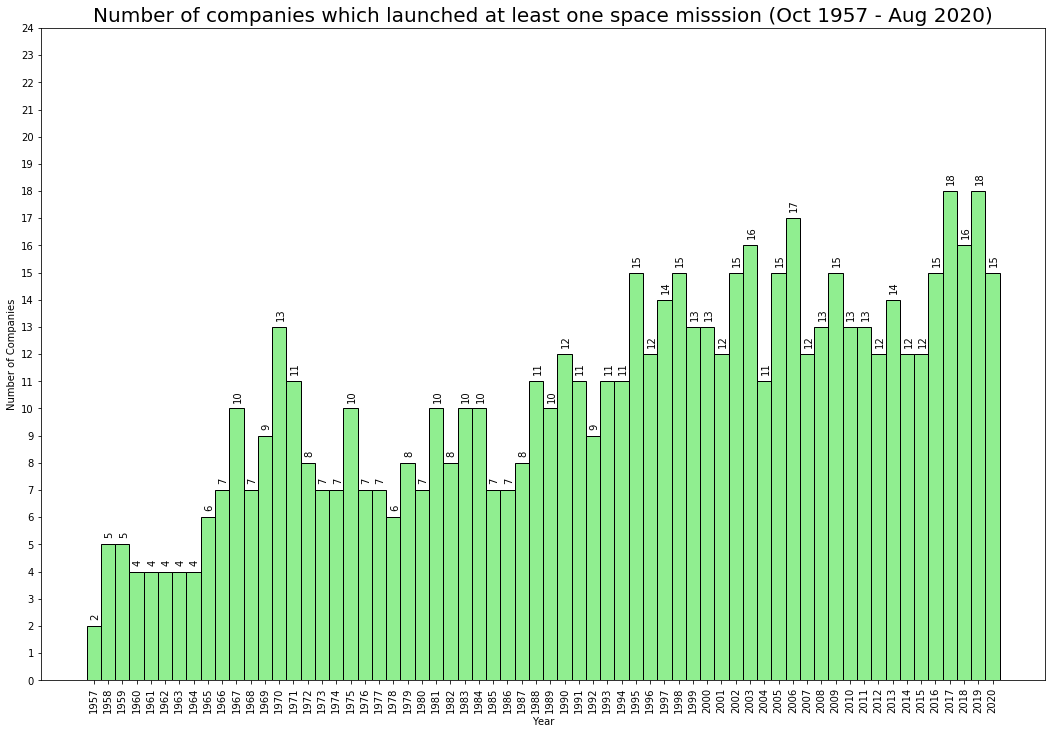

In [648]:
def active_companies(missions):
    year_begin =  min(missions["Year"])
    year_end = max(missions["Year"])

    active_companies = missions.groupby(["Year"])["Company Name"].nunique()

    plt.subplots(figsize=(18,12))
    plt.bar(active_companies.index, active_companies.values, 
        edgecolor="k", width=1, label="Success", color="lightgreen")
    plt.xticks(range(year_begin, year_end + 1), rotation=90)
    plt.yticks(range(0, 25))
    plt.xlabel("Year")
    plt.ylabel("Number of Companies")
    plt.title("Number of companies which launched at least one space misssion (Oct 1957 - Aug 2020)",
        fontdict={"fontsize":20})
    for year in range(year_begin, year_end + 1):
        plt.annotate(f"{active_companies[year]}", 
            (year - 0.25, active_companies[year] + 0.3), rotation=90)

active_companies(missions)

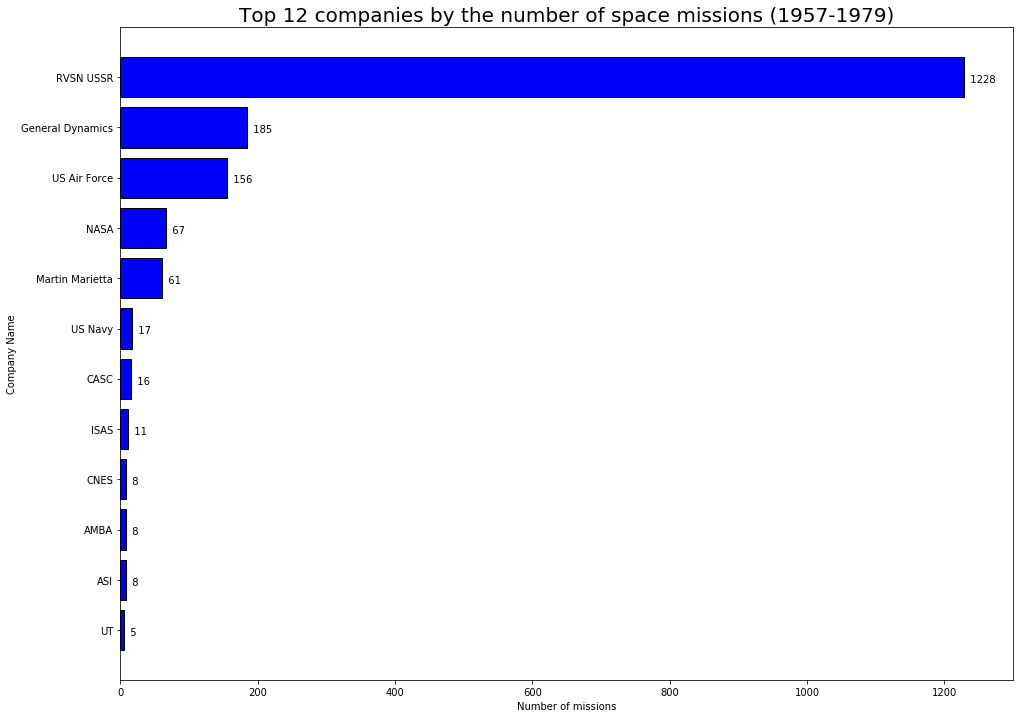

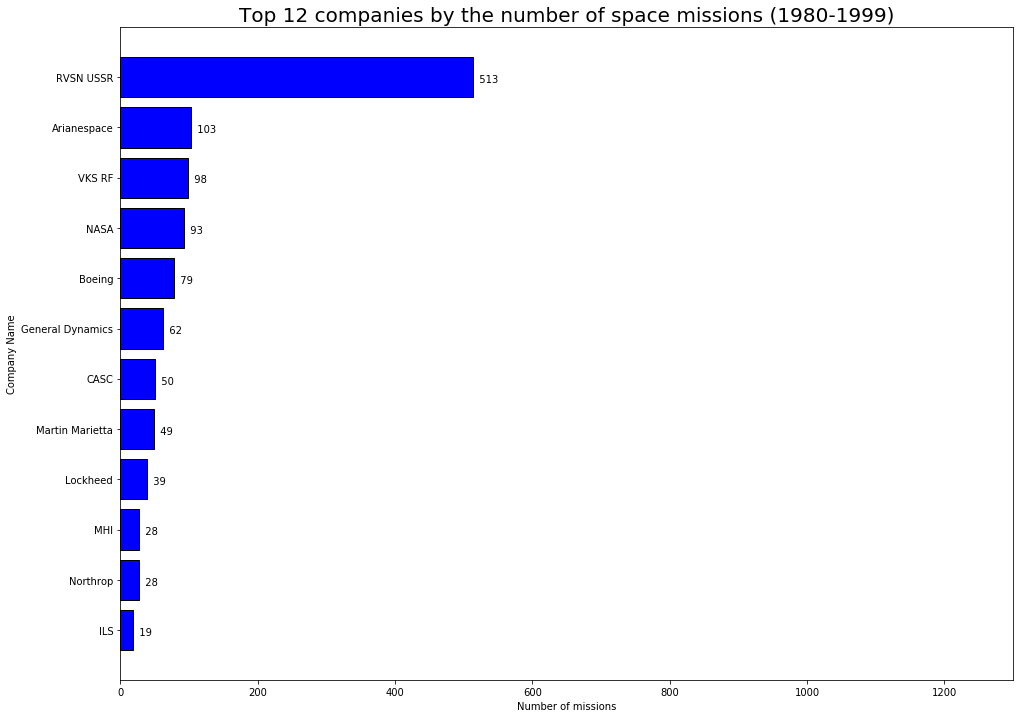

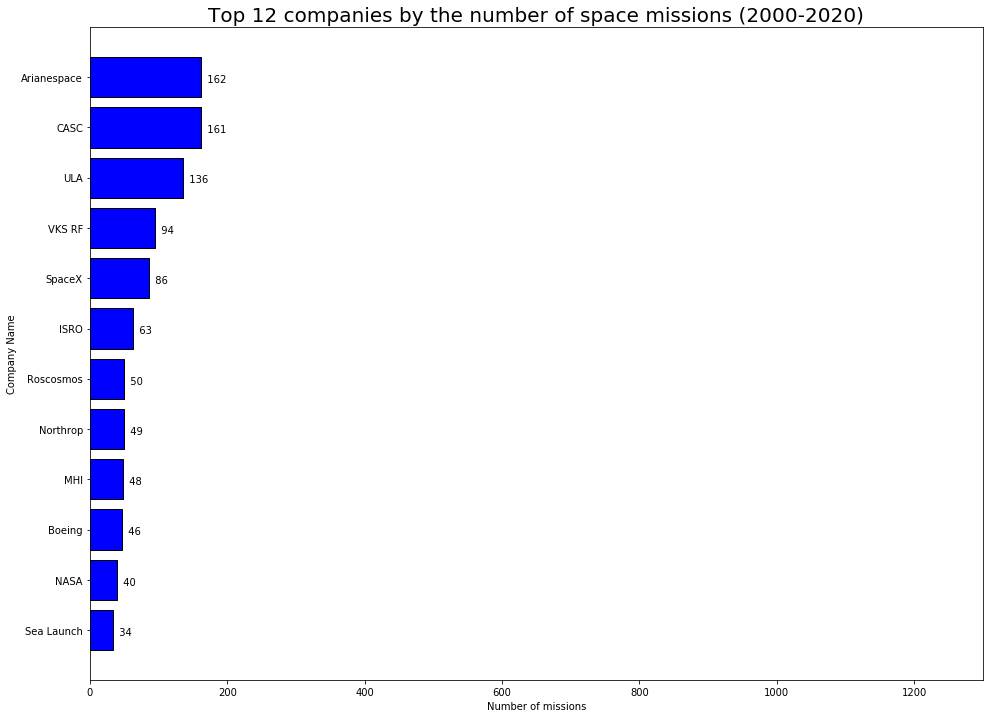

In [654]:
def top_companies(missions, since, to, n=12):
    top_companies = missions.loc[(missions["Year"] < to) & (missions["Year"] >= since)]["Company Name"].value_counts()[:n].sort_values()

    plt.subplots(figsize=(16,12))
    plt.barh(top_companies.index, top_companies.values, edgecolor='k', color="blue")
    plt.title(f"Top {n} companies by the number of space missions ({since}-{to})", {"fontsize":20})
    plt.xlabel("Number of missions")
    plt.ylabel("Company Name")
    plt.xlim((0, 1300))
    for i in range(n):
        plt.annotate(f"  {top_companies.iloc[i]}", (top_companies[i], i - 0.1))

top_companies(missions, 1957, 1979)
top_companies(missions, 1980, 1999)
top_companies(missions, 2000, 2020)

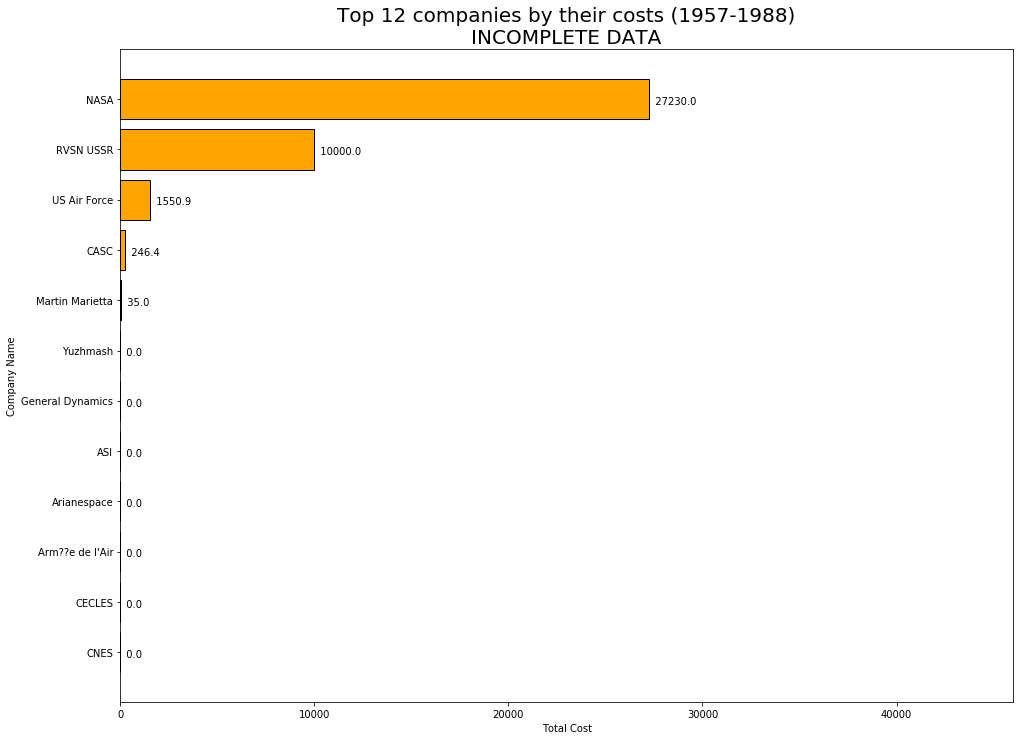

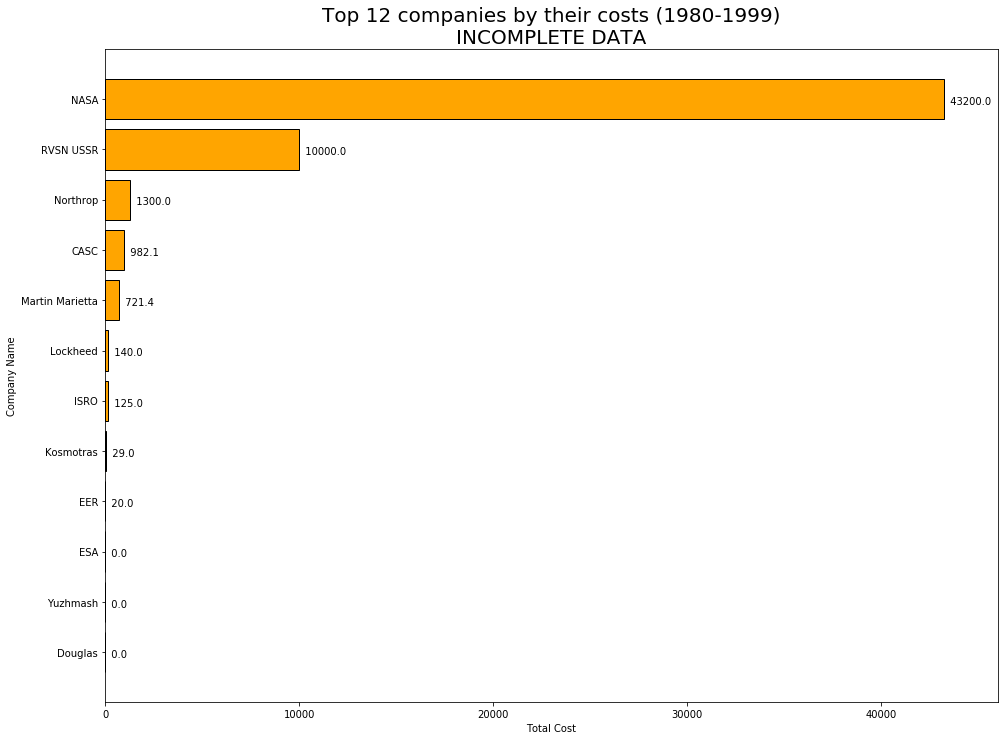

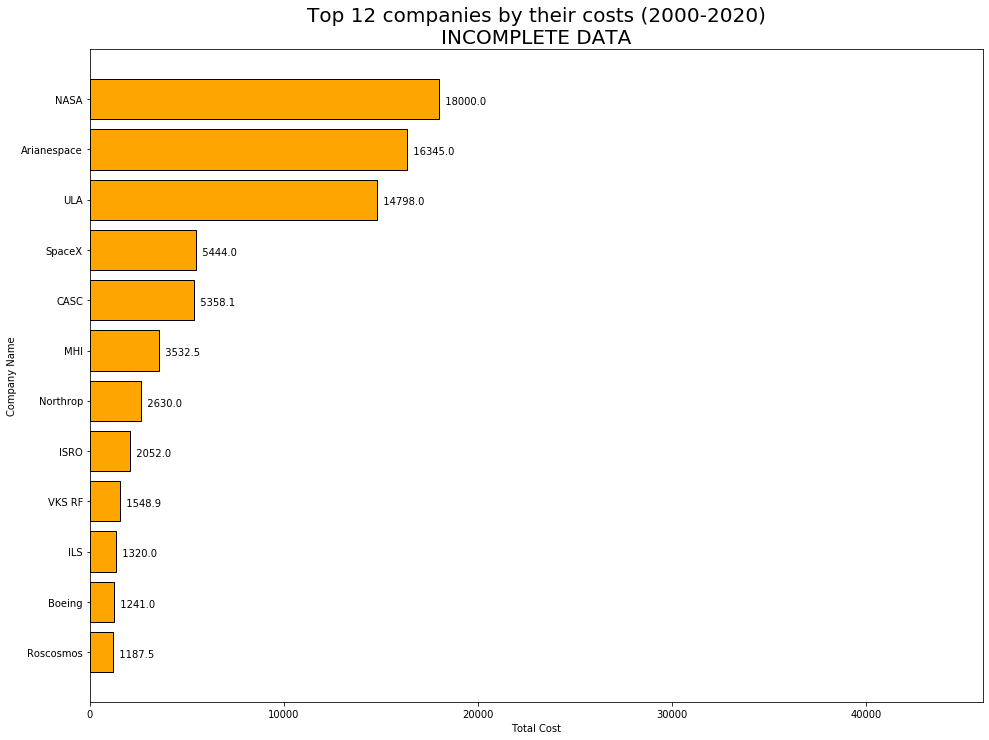

In [646]:
def top_companies_costs(missions, since, to, n=12):
    years = (missions["Year"] < to) & (missions["Year"] >= since)
    top_companies_costs = missions[years].groupby(missions["Company Name"])["Rocket"].sum().sort_values()[-n:]

    plt.subplots(figsize=(16,12))
    plt.barh(top_companies_costs.index, top_companies_costs.values, edgecolor='k', color="orange")
    plt.title(f"Top {n} companies by their costs ({since}-{to - 1})\nINCOMPLETE DATA", {"fontsize":20})
    plt.xlabel("Total Cost")
    plt.ylabel("Company Name")
    plt.xlim((0, 46000))
    for i in range(n):
        plt.annotate(f"  {top_companies_costs.iloc[i]:.1f}", (top_companies_costs[i], i - 0.1))

        
top_companies_costs(missions, 1957, 1989)
top_companies_costs(missions, 1980, 2000)
top_companies_costs(missions, 2000, 2021)